<a href="https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/precip_biomass_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Links

## Documentation
  * [Precipitation](https://docs.google.com/document/d/1mt-xiSmcJPR3_txNfsalTUlFv9xZrKPLGUAHW0mVqk0/edit)
    * Source: [MPG Ranch Weather Stations - Precipitation - Hourly_Archive.csv](https://drive.google.com/uc?id=1txnEIULLs1HSIGPLo6RlAgjvuCSdh2ZB)
  * [Vegetation Biomass](https://docs.google.com/document/d/1DIsO1yvobDKynRgoSvQ22HI4f8XYy5TPipa2vokGydQ/edit)
    * Source: [MPG_vegetation_biomass-2010_2018.csv](https://drive.google.com/uc?id=1gzpnX019uG9YoS4ZQOQEyf4OTuLPIHgT)

# Load

## Libraries

In [0]:
# for time series
install.packages("xts", repos="http://cloud.r-project.org")
library(xts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
# pliers for R
library(dplyr)

In [0]:
# set strings as factors to false
options(stringsAsFactors = FALSE)

In [0]:
library(tidyverse)

## Source Data

### Precip

In [0]:
# precip
precip_src <- 'https://drive.google.com/uc?id=1txnEIULLs1HSIGPLo6RlAgjvuCSdh2ZB'
dat_p <- read.csv(precip_src)

In [0]:
str(dat_p)

'data.frame':	200790 obs. of  7 variables:
 $ Date.Time                  : chr  "2012-06-19 16:00:00" "2012-06-19 16:05:00" "2012-06-19 16:10:00" "2012-06-19 16:15:00" ...
 $ Baldy.Summit.Rain..in.     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Baldy.Draw.Rain..in.       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Sanfoin.Bench.Rain..in.    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ South.Baldy.Ridge.Rain..in.: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Orchard.House.Rain..in.    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Indian.Ridge.Rain..in.     : num  NA NA NA NA NA NA NA NA NA NA ...


In [0]:
summary(dat_p)

  Date.Time         Baldy.Summit.Rain..in. Baldy.Draw.Rain..in.
 Length:200790      Min.   :0.0000000      Min.   :0.0000000   
 Class :character   1st Qu.:0.0000000      1st Qu.:0.0000000   
 Mode  :character   Median :0.0000000      Median :0.0000000   
                    Mean   :0.0003204      Mean   :0.0003992   
                    3rd Qu.:0.0000000      3rd Qu.:0.0000000   
                    Max.   :0.4700000      Max.   :0.4100000   
                                                               
 Sanfoin.Bench.Rain..in. South.Baldy.Ridge.Rain..in. Orchard.House.Rain..in.
 Min.   :0.0000000       Min.   :0.0000000           Min.   :0.0000000      
 1st Qu.:0.0000000       1st Qu.:0.0000000           1st Qu.:0.0000000      
 Median :0.0000000       Median :0.0000000           Median :0.0000000      
 Mean   :0.0003603       Mean   :0.0003559           Mean   :0.0003969      
 3rd Qu.:0.0000000       3rd Qu.:0.0000000           3rd Qu.:0.0000000      
 Max.   :0.2500000       M

### Biomass

In [0]:
biomass_src <- 'https://drive.google.com/uc?id=1gzpnX019uG9YoS4ZQOQEyf4OTuLPIHgT'
dat_b <- read.csv(biomass_src)

In [0]:
summary(dat_b)

     gridpt           year         season             type     
 Min.   :  2.0   Min.   :2010   fall  :2081   Active    : 464  
 1st Qu.: 82.0   1st Qu.:2012   spring:1872   Degraded  :1067  
 Median :191.0   Median :2013                 Draw weedy:  69  
 Mean   :198.7   Mean   :2013                 Forest    :  88  
 3rd Qu.:300.0   3rd Qu.:2015                 irrigation: 226  
 Max.   :574.0   Max.   :2018                 Range     :1910  
                                              Riparian  : 129  
  pt_avg_grams         lat             long     
 Min.   : 0.000   Min.   :46.67   Min.   :-114  
 1st Qu.: 2.141   1st Qu.:46.68   1st Qu.:-114  
 Median : 4.997   Median :46.70   Median :-114  
 Mean   : 7.262   Mean   :46.70   Mean   :-114  
 3rd Qu.: 9.854   3rd Qu.:46.71   3rd Qu.:-114  
 Max.   :87.185   Max.   :46.73   Max.   :-114  
 NA's   :1975                                   

In [0]:
tail(dat_b, 2)

,gridpt,year,season,type,pt_avg_grams,lat,long
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
3952,574,2011,spring,Range,NA,46.69435,-114.0075
3953,574,2010,fall,Range,NA,46.69435,-114.0075


# Transform

## Group and Sum
  * by stations and from multiple selections per day to daily

### Precip

In [0]:
# make dataframe aware of datetime object
dat_p$Date.Time <- as.POSIXct(dat_p$Date.Time, format = "%Y-%m-%d %H:%M:%S")

In [0]:
# average all station columns together in existing time series format
stations_ave_halfhour <- mutate(dat_p, mpg_stations_ave = rowMeans(select(dat_p, ends_with("..in.")), na.rm = TRUE))

In [0]:
summary(stations_ave_halfhour)

   Date.Time                   Baldy.Summit.Rain..in. Baldy.Draw.Rain..in.
 Min.   :2012-06-19 16:00:00   Min.   :0.0000000      Min.   :0.0000000   
 1st Qu.:2012-12-15 10:31:15   1st Qu.:0.0000000      1st Qu.:0.0000000   
 Median :2013-09-13 21:57:30   Median :0.0000000      Median :0.0000000   
 Mean   :2014-10-02 12:39:23   Mean   :0.0003204      Mean   :0.0003992   
 3rd Qu.:2016-06-09 22:22:30   3rd Qu.:0.0000000      3rd Qu.:0.0000000   
 Max.   :2019-04-21 17:00:00   Max.   :0.4700000      Max.   :0.4100000   
                                                                          
 Sanfoin.Bench.Rain..in. South.Baldy.Ridge.Rain..in. Orchard.House.Rain..in.
 Min.   :0.0000000       Min.   :0.0000000           Min.   :0.0000000      
 1st Qu.:0.0000000       1st Qu.:0.0000000           1st Qu.:0.0000000      
 Median :0.0000000       Median :0.0000000           Median :0.0000000      
 Mean   :0.0003603       Mean   :0.0003559           Mean   :0.0003969      
 3rd Qu.:0.0000

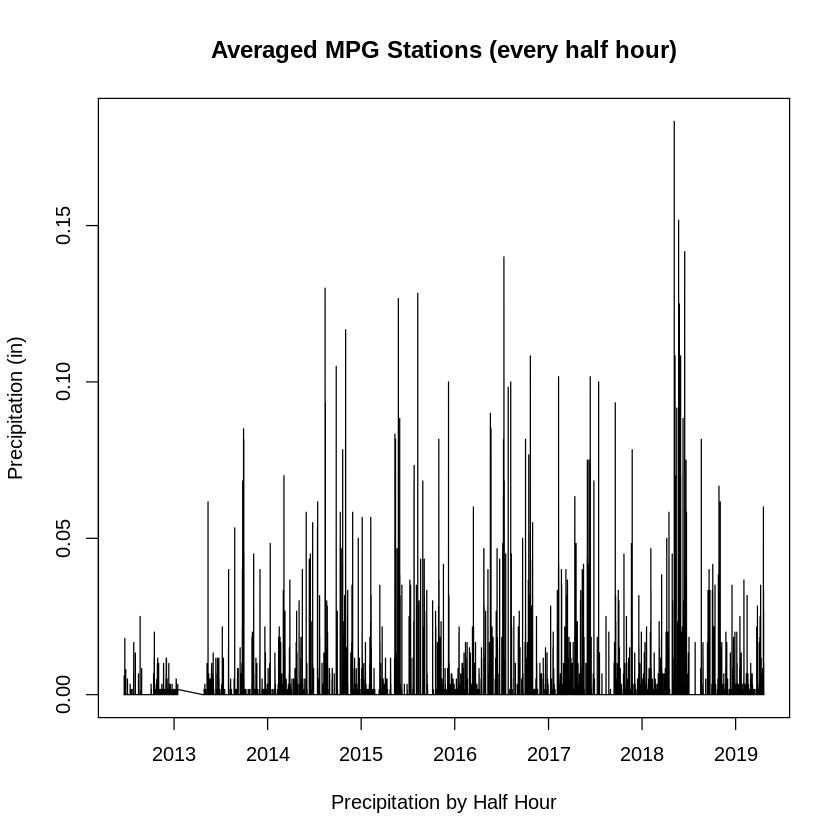

In [0]:
# Baldy Summit, Baldy Draw, Sanfoin Bench, Baldy Ridge, Orchard House, Indian Ridge
plot(x = stations_ave_halfhour$Date.Time, y = stations_ave_halfhour$mpg_stations_ave, type = "l"
    , xlab="Precipitation by Half Hour", ylab="Precipitation (in)")
title(main="Averaged MPG Stations (every half hour)")

In [0]:
# group and sum each day
p_daily <- dat_p %>%
  mutate(day = as.Date(Date.Time, format = "%Y-%M-%d")) %>%
  group_by(day) %>%
  summarise_at(c("Baldy.Summit.Rain..in.", "Baldy.Draw.Rain..in.", 
                 "Sanfoin.Bench.Rain..in.", "South.Baldy.Ridge.Rain..in.", 
                 "Orchard.House.Rain..in.", "Indian.Ridge.Rain..in."), sum, na.rm=TRUE) %>%
  na.omit()

In [0]:
head(filter(p_daily$day == "2013"))

ERROR: ignored

In [0]:
summary(p_daily)

      day             Baldy.Summit.Rain..in. Baldy.Draw.Rain..in.
 Min.   :2012-06-19   Min.   :0.00000        Min.   :0.00000     
 1st Qu.:2014-05-18   1st Qu.:0.00000        1st Qu.:0.00000     
 Median :2016-01-08   Median :0.00000        Median :0.00000     
 Mean   :2015-12-30   Mean   :0.02682        Mean   :0.03341     
 3rd Qu.:2017-08-29   3rd Qu.:0.01000        3rd Qu.:0.01000     
 Max.   :2019-04-21   Max.   :1.02000        Max.   :1.24000     
 Sanfoin.Bench.Rain..in. South.Baldy.Ridge.Rain..in. Orchard.House.Rain..in.
 Min.   :0.00000         Min.   :0.00000             Min.   :0.00000        
 1st Qu.:0.00000         1st Qu.:0.00000             1st Qu.:0.00000        
 Median :0.00000         Median :0.00000             Median :0.00000        
 Mean   :0.03015         Mean   :0.02979             Mean   :0.03322        
 3rd Qu.:0.01000         3rd Qu.:0.01000             3rd Qu.:0.02000        
 Max.   :1.12000         Max.   :1.20000             Max.   :1.16000        

In [0]:
p_daily_long <- gather(p_daily, station, value, -day)

In [0]:
summary(p_daily_long)

      day               station              value        
 Min.   :2012-06-19   Length:14394       Min.   :0.00000  
 1st Qu.:2014-05-18   Class :character   1st Qu.:0.00000  
 Median :2016-01-08   Mode  :character   Median :0.00000  
 Mean   :2015-12-30                      Mean   :0.02959  
 3rd Qu.:2017-08-30                      3rd Qu.:0.01000  
 Max.   :2019-04-21                      Max.   :1.24000  

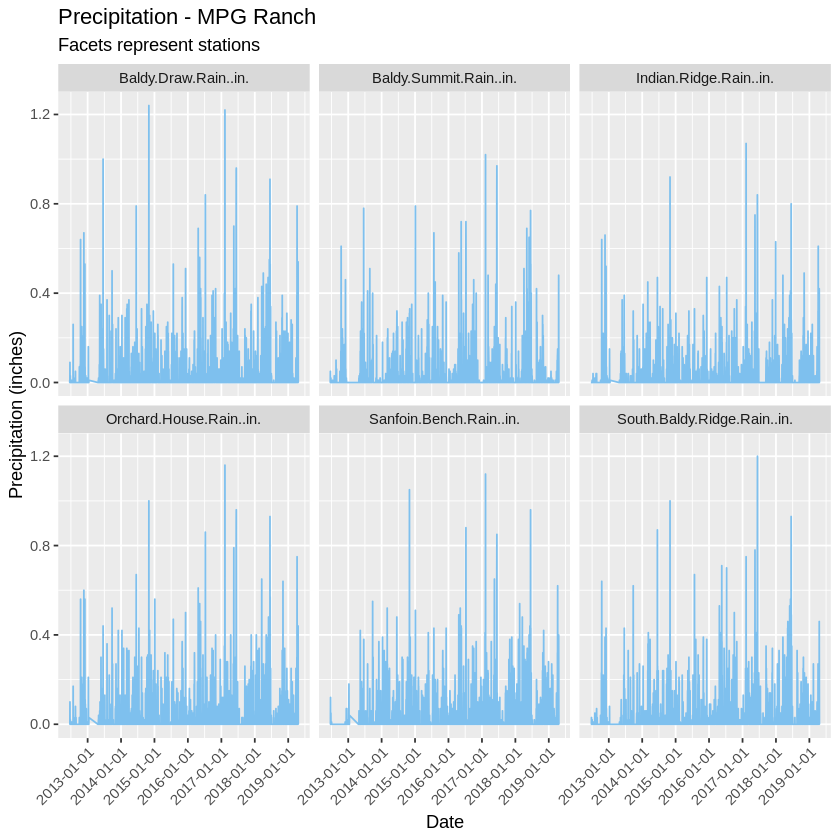

In [0]:
p_daily_long %>%
  na.omit() %>%
ggplot(aes(x = day, y = value)) +
  geom_line(color = "skyblue2") +
  facet_wrap( ~ station ) +
  labs(title = "Precipitation - MPG Ranch",
      subtitle = "Facets represent stations",
      y = "Precipitation (inches)",
      x = "Date") + 
  scale_x_date(date_breaks = "years") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [0]:
# group and sum each day
p_monthly <- dat_p %>%
  mutate(month = as.Date(Date.Time, format = "%Y-%M")) %>%
  group_by(month) %>%
  summarise_at(c("Baldy.Summit.Rain..in.", "Baldy.Draw.Rain..in.", 
                 "Sanfoin.Bench.Rain..in.", "South.Baldy.Ridge.Rain..in.", 
                 "Orchard.House.Rain..in.", "Indian.Ridge.Rain..in."), sum, na.rm=TRUE) %>%
  na.omit()

In [0]:
summary(p_monthly)

     month            Baldy.Summit.Rain..in. Baldy.Draw.Rain..in.
 Min.   :2012-06-19   Min.   :0.00000        Min.   :0.00000     
 1st Qu.:2014-05-18   1st Qu.:0.00000        1st Qu.:0.00000     
 Median :2016-01-08   Median :0.00000        Median :0.00000     
 Mean   :2015-12-30   Mean   :0.02682        Mean   :0.03341     
 3rd Qu.:2017-08-29   3rd Qu.:0.01000        3rd Qu.:0.01000     
 Max.   :2019-04-21   Max.   :1.02000        Max.   :1.24000     
 Sanfoin.Bench.Rain..in. South.Baldy.Ridge.Rain..in. Orchard.House.Rain..in.
 Min.   :0.00000         Min.   :0.00000             Min.   :0.00000        
 1st Qu.:0.00000         1st Qu.:0.00000             1st Qu.:0.00000        
 Median :0.00000         Median :0.00000             Median :0.00000        
 Mean   :0.03015         Mean   :0.02979             Mean   :0.03322        
 3rd Qu.:0.01000         3rd Qu.:0.01000             3rd Qu.:0.02000        
 Max.   :1.12000         Max.   :1.20000             Max.   :1.16000        

In [0]:
# scratch

In [0]:
# ?????????
# average to daily temperatures
p_daily <- dat_p %>%
  mutate(day = as.Date(Date.Time, format = "%Y-%M-%d")) %>%
  group_by(day) %>%
  suammarise(mean_temp=)

In [0]:
# coerce to xts for time series manipulation
dat_p$Date.Time <- as.xts(dat_p[ , -1], order.by = dat_p$Date.Time)

In [0]:
summary(dat_p)

   Date.Time                   Baldy.Summit.Rain..in. Baldy.Draw.Rain..in.
 Min.   :2012-06-19 16:00:00   Min.   :0.0000000      Min.   :0.0000000   
 1st Qu.:2012-12-15 10:31:15   1st Qu.:0.0000000      1st Qu.:0.0000000   
 Median :2013-09-13 21:57:30   Median :0.0000000      Median :0.0000000   
 Mean   :2014-10-02 12:39:23   Mean   :0.0003204      Mean   :0.0003992   
 3rd Qu.:2016-06-09 22:22:30   3rd Qu.:0.0000000      3rd Qu.:0.0000000   
 Max.   :2019-04-21 17:00:00   Max.   :0.4700000      Max.   :0.4100000   
                                                                          
 Sanfoin.Bench.Rain..in. South.Baldy.Ridge.Rain..in. Orchard.House.Rain..in.
 Min.   :0.0000000       Min.   :0.0000000           Min.   :0.0000000      
 1st Qu.:0.0000000       1st Qu.:0.0000000           1st Qu.:0.0000000      
 Median :0.0000000       Median :0.0000000           Median :0.0000000      
 Mean   :0.0003603       Mean   :0.0003559           Mean   :0.0003969      
 3rd Qu.:0.0000

### Biomass

In [0]:
# coerce to time series format
dat_b$year <- as.y

# notes
# consider translating season to quarter

ERROR: ignored

# Visualize

# Notes
* [Seasonal summaries of daily climate data](https://stackoverflow.com/questions/22446636/seasonal-summaries-of-daily-climate-data?rq=1)
* [Dplyr - Mean for multiple columns](https://stackoverflow.com/questions/28744419/dplyr-mean-for-multiple-columns)
* [Summarize Time Series Data by Month or Year Using Tidyverse Pipes in R]()